In [1]:
from tod import CSV_Reader, WormViewer
import cv2
import numpy as np
import time

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams["figure.figsize"] = (20,3)


from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import Video

%load_ext autoreload
%autoreload 2

In [2]:
def draw_from_output(img, outputs, col=(255,255,0), text=None):
    """ Img is cv2.imread(img) and outputs are (x1, y1, x2, y2, conf, cls_conf)
    Returns the image with all the boudning boxes drawn on the img """
    for output in outputs:
        # output = [float(n) for n in output]
        x1, y1, w, h= output
        x1, y1, x2, y2 = int(x1), int(y1), int(x1 + w), int(y1 + h)
        cv2.rectangle(img, (x1,y1), (x2,y2), col, 2)

        if text is not None:
            cv2.putText(img, f"{round(float(conf), 3) : }{text}",
                        (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, col, 2)

            
# Helper Functions
def get_worms(image, bbs):
    """ Takes image and list of bbs and returns a list of the
    cutouts for each worm"""
    worms = []
    for bb in bbs:
        bb = bb.astype(int)
        x, y, w, h = bb
        worm = image[y:y+h, x:x+w]
        worms.append(worm)
    
    return worms


def display_worms(worms: list[np.ndarray]):
    """List of worm images and then makes a figure with all
    the worms"""
    worm_count = len(worms)
    fig = plt.figure()
    
    for i in range(worm_count):
        fig.add_subplot(1, worm_count, i + 1)
        plt.imshow(worms[i])
    
    plt.show(block=True)

In [5]:
csv_path = "./data/1046.csv"
vid_path = "./data/1046.avi"

processer = CSV_Reader(csv_path, vid_path)
frame, bbs = processer.get_worms_from_frame(2400)
results = processer.get_worms_from_end(2400, 20)

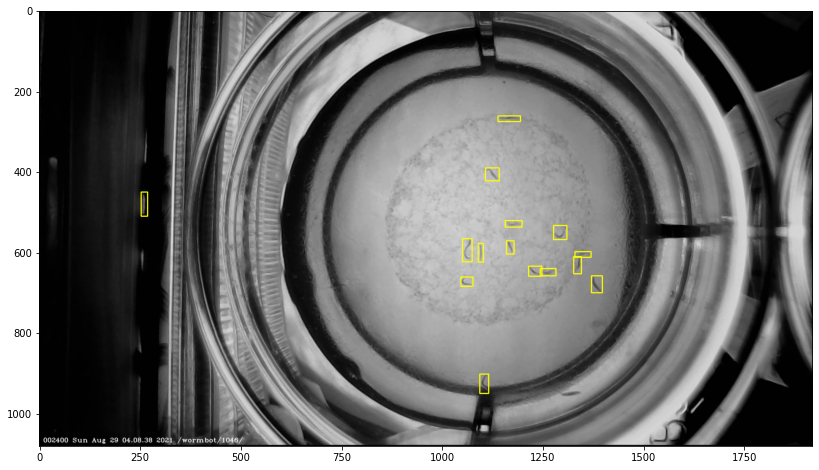

In [6]:
plt.figure(figsize=(20,8))

last = frame.copy()
draw_from_output(last, processer.tracked)
plt.imshow(last)

## Above shows the tracked frame.
___It's done by getting all detections for last 20 frames and then doing nms to isolate unique___

Next will itterate through the frames in reverse and will analyze the dedicated bounding box in each frame.

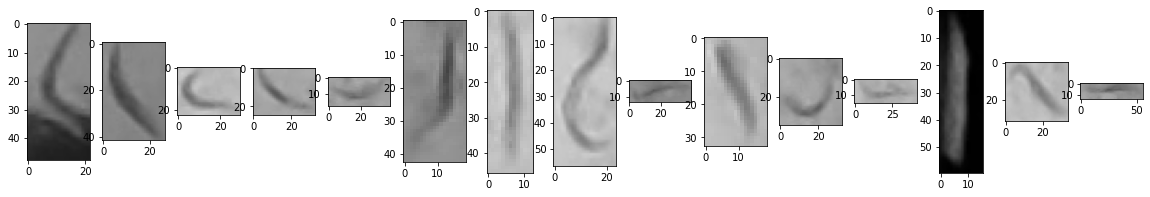

15

In [7]:
viewer = WormViewer(csv_path, vid_path, first=2400)
worms = viewer.fetch_worms(np.arange(0, 15, 1), 2400)
display_worms(worms)
len(viewer.tracked)

In [8]:
# Make worm video by worm id if video is true.
video = True

if video == True:
    for i in range(len(viewer.tracked)):
        viewer.create_worm_video(i, 1500)
        
# viewer.create_worm_video(2, 2000)

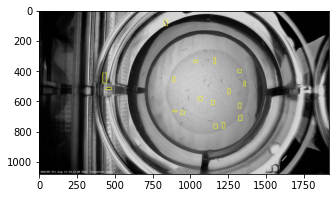

In [27]:
_, t = processer.get_frame(100)
draw_from_output(t, processer.tracked)
plt.imshow(t)

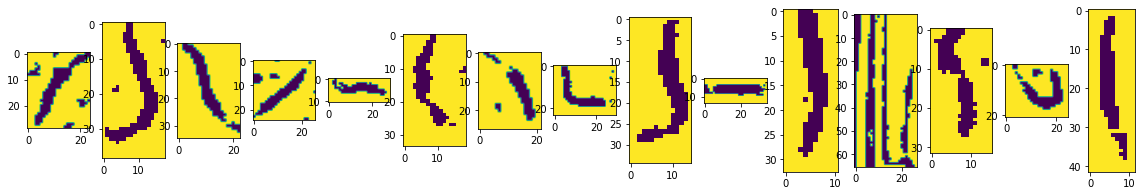

In [28]:
transformed = viewer.transform_all_worms(worms)
display_worms(transformed)

In [29]:
# Determine time of death from the experiment
# Also determine how long it takes to process.
start = time.time()

scores = viewer.compute_score()

delta = time.time() - start
print(f"took: {delta} seconds. \n Fviewer count: {viewer.scan} \n Worm count: {len(viewer.tracked)}")

  2%|▏         | 3/200 [00:00<00:14, 13.23it/s]

skipping empty


100%|██████████| 200/200 [01:42<00:00,  1.95it/s]

took: 102.68259787559509 seconds. 
 Fviewer count: 2000 
 Worm count: 17


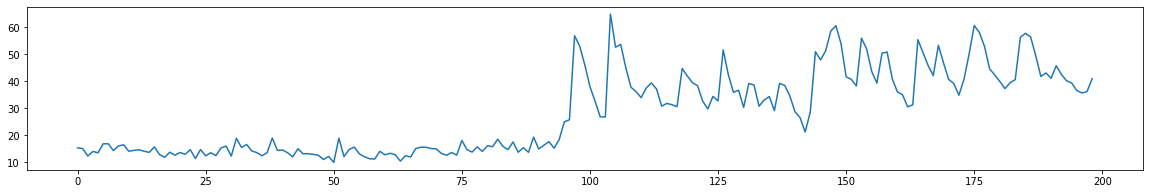

In [36]:
plt.plot(scores[0])

In [37]:
# scores[5]

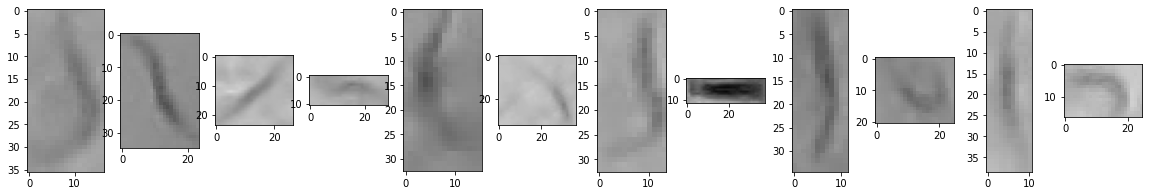

In [38]:
frame, bbs = viewer.get_worms_from_frame(2400)
worms = get_worms(frame, bbs)
display_worms(worms)

In [39]:
viewer.worm_state

{0: 1420,
 1: 1320,
 2: 1410,
 3: 1340,
 4: 1320,
 5: 1320,
 6: 1400,
 7: 1460,
 8: 1600,
 9: False,
 10: 1280,
 11: False,
 12: 1330,
 13: 1100,
 14: 1200,
 15: 1190,
 16: False}

In [40]:
viewer.save_scored_data(1047)

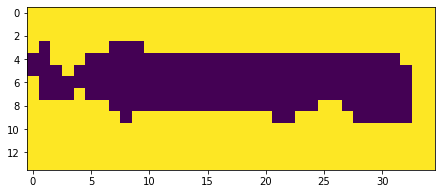

In [35]:
plt.imshow(viewer.older[8, 9])